# clusters of schools
https://levelup.gitconnected.com/clustering-gps-co-ordinates-forming-regions-4f50caa7e4a1

In [169]:
from importlib import reload
import houses.__main__
reload(houses.__main__)
from houses.__main__ import SchoolsStorage

In [170]:
storage = SchoolsStorage.init()

In [5]:
import pandas as pd

In [71]:
df =  pd.DataFrame(storage.iter_school_urn_to_coordinates("London"))
print(len(df))
df.head(3)

510


,urn,latitude,longitude
0,100001,51.519129,-0.094509
1,100002,51.513834,-0.096820
2,100049,51.544842,-0.154354


## One method to validate the number of clusters is the elbow method.

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10), and for each value of k calculate the Sum of Squared Errors (SSE).

When K increases, the centroids are closer to the clusters centroids. The improvements will decline rapidly at some point, creating the elbow shape. That is the optimal value for K.

This might take a while.. stretch a little.

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [72]:
def plot_elbow(k):
    k_clusters = range(1, k)
    kmeans = [KMeans(n_clusters=i) for i in k_clusters]
    y_axis = df[['latitude']]
    x_axis = df[['longitude']]
    score = [kmeans[i].fit(y_axis).score(y_axis) for i in range(len(kmeans))]
    # Visualize
    plt.plot(k_clusters, score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()

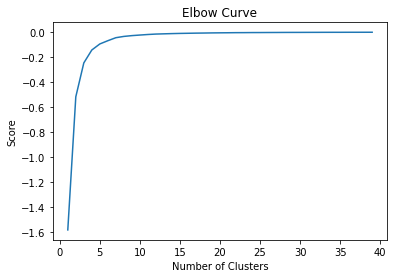

CPU times: user 5.64 s, sys: 108 ms, total: 5.75 s
Wall time: 2.93 s


In [73]:
%time plot_elbow(40)

When we graph the plot, we see that the graph levels off slowly after 3 clusters. This implies that addition of more clusters will not help us that much.

In [116]:
def cluster_schools_by_location(*, dataframe, n_scools_in_cluster):
    kmeans = KMeans(n_clusters = int(len(dataframe) / n_scools_in_cluster), init ='k-means++')
    coordinates = dataframe.columns[dataframe.columns.get_loc('latitude'):dataframe.columns.get_loc('longitude') + 1]
    kmeans.fit(dataframe[coordinates]) # Compute k-means clustering.
    dataframe['cluster_label'] = kmeans.fit_predict(dataframe[coordinates])
    centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
    labels = kmeans.predict(dataframe[coordinates]) # Labels of each point
    return centers, labels

In [119]:
def get_cluster(*, dataframe, cluster_n):
    return dataframe[dataframe['cluster_label']==cluster_n]

In [75]:
cluster_1 = df[df['cluster_label']==1]
cluster_1.head()
print(list(cluster_1["urn"]))
cluster_df = pd.DataFrame(storage.iter_schools_by_urn(cluster_1["urn"]))
cluster_df.head()

['134735', '138607', '141617']


,_id,urn,laname,la,estab,laestab,schname,street,locality,address3,...,schooltype,isprimary,issecondary,ispost16,agelow,agehigh,gender,relchar,admpol,location
0,134735,134735,Hammersmith and Fulham,205,6404,2056404,Chelsea Independent College,517 - 523 Fulham Road,,,...,Other independent school,0,1,1,14,21,Mixed,None,Not applicable,"{'postcode': 'SW6 1HD', 'status': 'live', 'use..."
1,138607,138607,Hammersmith and Fulham,205,4632,2054632,Lady Margaret School,Parson's Green,,,...,Academy converter,0,1,1,11,18,Girls,Church of England,Non-selective,"{'postcode': 'SW6 4UN', 'status': 'live', 'use..."
2,141617,141617,Hammersmith and Fulham,205,4002,2054002,The Hurlingham Academy,Peterborough Road,Fulham,,...,Academy sponsor led,0,1,0,11,16,Mixed,Does not apply,Non-selective,"{'postcode': 'SW6 3ED', 'status': 'live', 'use..."


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

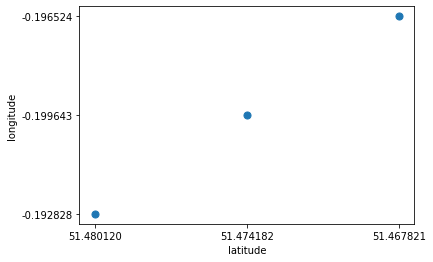

In [83]:
cluster_1.plot.scatter(x = 'latitude', y = 'longitude', s=50, cmap='viridis')

## In London only

In [171]:
all_schools_df =  pd.DataFrame(storage.iter_schools(town="London"))
print(len(all_schools_df))
all_schools_df.head(3)

492


,urn,postcode,town,locality,laname,schooltype,minorgroup,latitude,longitude,schname
0,100001,EC2Y 8BB,London,Barbican,City of London,Other independent school,Independent school,51.519129,-0.094509,City of London School for Girls
1,100002,EC4M 9AD,London,,City of London,Other independent school,Independent school,51.513834,-0.096820,St Paul's Cathedral School
2,100049,NW3 2BQ,London,Chalk Farm,Camden,Community school,Maintained school,51.544842,-0.154354,Haverstock School


In [160]:
cluster_schools_by_location(dataframe=all_schools_df, n_scools_in_cluster=3)

all_schools_df.head(3)

,urn,postcode,town,locality,laname,schooltype,minorgroup,latitude,longitude,schname,cluster_label
0,100001,EC2Y 8BB,London,Barbican,City of London,Other independent school,Independent school,51.519129,-0.094509,City of London School for Girls,36
1,100002,EC4M 9AD,London,,City of London,Other independent school,Independent school,51.513834,-0.096820,St Paul's Cathedral School,36
2,100049,NW3 2BQ,London,Chalk Farm,Camden,Community school,Maintained school,51.544842,-0.154354,Haverstock School,51


In [161]:
max(all_schools_df.cluster_label.unique())

163

In [162]:
get_cluster(dataframe=all_schools_df, cluster_n=4)

,urn,postcode,town,locality,laname,schooltype,minorgroup,latitude,longitude,schname,cluster_label
241,132727,E17 5DP,London,Walthamstow,Waltham Forest,Academy sponsor led,Academy,51.599489,-0.024440,Walthamstow Academy,4
359,138859,E4 8SG,London,Chingford,Waltham Forest,Academy sponsor led,Academy,51.604231,-0.014486,South Chingford Foundation School,4


In [164]:
# filter out clusters that have less than 2 schools
has_at_least_2_schls = all_schools_df.groupby('cluster_label').filter(lambda x: len(x) > 1)
len(has_at_least_2_schls.cluster_label.unique())

136

In [167]:
get_cluster(dataframe=has_at_least_2_schls, cluster_n=29)

,urn,postcode,town,locality,laname,schooltype,minorgroup,latitude,longitude,schname,cluster_label
70,100624,SE19 3NY,London,Lambeth,Lambeth,Community school,Maintained school,51.422730,-0.098493,Norwood School,29
152,101856,SE19 3QN,London,Upper Norwood,Croydon,Community special school,Special school,51.420240,-0.094687,Priory School,29
221,131280,SE19 1RS,London,Upper Norwood,Croydon,Voluntary aided school,Maintained school,51.421514,-0.094502,Virgo Fidelis Convent Senior School,29


## Visualise cluster